In [1]:
from voronoi import *

In [2]:
inputfile = "points_9.txt"
inputfile = "random100.txt"

In [3]:
coordinates = read_coordinates(inputfile)

In [4]:
points, vertices, ridges = load_points(coordinates)

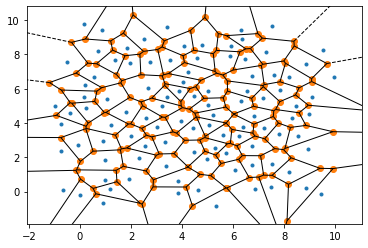

In [5]:
# Show Voronou digram
plot_voronoi(points)

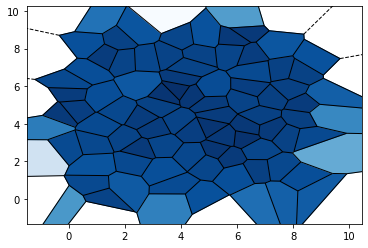

In [11]:
# Show Voronoi digram colored by properties: area, ridge_stdev, angle_stdev
plot_voronoi_color(points, color_by="area", log=True, cmap="Blues_r", color_cut=0.1, enlarge=0.5)

In [7]:
# check point properties
p = points[4]
print("   Point Corrdinates:", p.xy)
if p.enclosed:
    print("      Enclosed: True")
else:
    print("      Enclosed: False")
print("   Vertices of point: ")
if p.vertices:
    print("      ", [pv.xy for pv in p.vertices])
else:
    print("      Open region doesn't have closing vertices.")
print("   Ridges of point: ")
for r in p.ridges:
    if not r.open:
        print("      ", [v.xy for v in r.vertices])
    else:
        print("      Open ridge")
print("   Neighbors:")
for n in p.neighbor_points:
    print("      ", n.xy)
print("   Area:%.3f" % p.area)
print()


   Point Corrdinates: [0.219, 4.897]
      Enclosed: True
   Vertices of point: 
       [array([0.57681543, 5.25897398]), array([-0.32314607,  5.15518695]), array([0.32487001, 3.99869807]), array([0.95828943, 4.61069752])]
   Ridges of point: 
       [array([0.32487001, 3.99869807]), array([-0.32314607,  5.15518695])]
       [array([0.95828943, 4.61069752]), array([0.57681543, 5.25897398])]
       [array([0.32487001, 3.99869807]), array([0.95828943, 4.61069752])]
       [array([-0.32314607,  5.15518695]), array([0.57681543, 5.25897398])]
   Neighbors:
       [-0.386, 4.558]
       [1.067, 5.396]
       [1.219, 3.862]
       [0.146, 5.53]
   Area:0.876



In [8]:
v = p.vertices[0] 

print("   Enclosed region Vertex Corrdinates:", v.xy)
print("   Points of this vertex:")
for p in v.points:
    print("      ", p.xy)
print("   Ridges coordinates of this vertex:")
for r in v.ridges:
    if not r.open:
        print("      ", [vofr.xy for vofr in r.vertices])
print()

   Enclosed region Vertex Corrdinates: [0.57681543 5.25897398]
   Points of this vertex:
       [0.219, 4.897]
       [0.146, 5.53]
       [1.067, 5.396]
   Ridges coordinates of this vertex:
       [array([0.95828943, 4.61069752]), array([0.57681543, 5.25897398])]
       [array([0.57681543, 5.25897398]), array([0.66437197, 5.86076181])]
       [array([-0.32314607,  5.15518695]), array([0.57681543, 5.25897398])]



In [9]:
r = p.ridges[0]
if not r.open:
    print("   Ridge", r.vertices[0].xy, " - ", r.vertices[1].xy)
    print("   Length:", r.length)
    print("   Points it belongs:")
    for p in r.points:
        print("      ", p.xy)
    print()
else:
    print("This is an open ridge.")

   Ridge [1.01928526 4.61674143]  -  [0.95828943 4.61069752]
   Length: 0.061294532281846247
   Points it belongs:
       [1.067, 5.396]
       [1.219, 3.862]



In [10]:
# How chaotic is neighbor number distribution?
neighbor_counts_closed = [len(p.neighbor_points) for p in points if p.enclosed]
print("Neighbor number distribution:", neighbor_counts_closed)
print("Neighbor(enclosed region) number distribution entropy: %.3f" % entropy(neighbor_counts_closed))

Neighbor number distribution: [4, 6, 5, 4, 5, 7, 6, 4, 6, 6, 6, 5, 6, 4, 5, 4, 8, 7, 7, 7, 7, 9, 5, 6, 6, 5, 6, 6, 5, 4, 6, 4, 4, 6, 7, 5, 7, 6, 7, 5, 8, 5, 6, 6, 5, 5, 5, 7, 4, 6, 7, 5, 5, 6, 6, 7, 7, 6, 5, 6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 5, 6, 4, 6, 6, 5, 7, 6, 6, 5, 5, 4, 8, 4, 6, 7, 5]
Neighbor(enclosed region) number distribution entropy: 4.482
